24


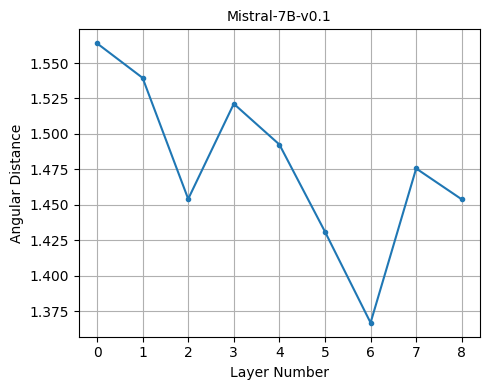

23


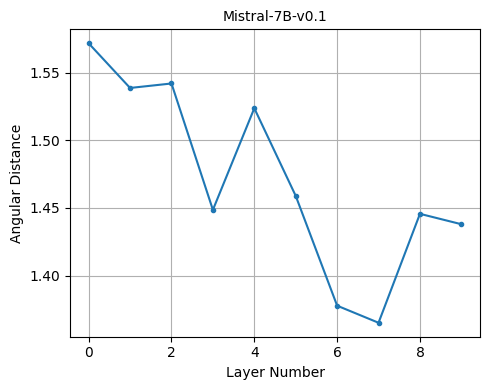

22


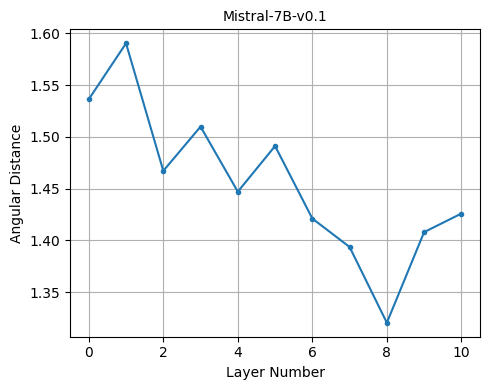

21


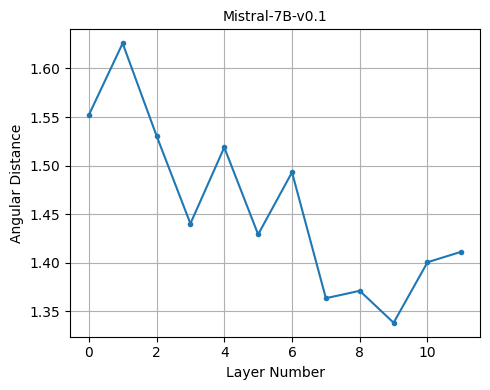

20


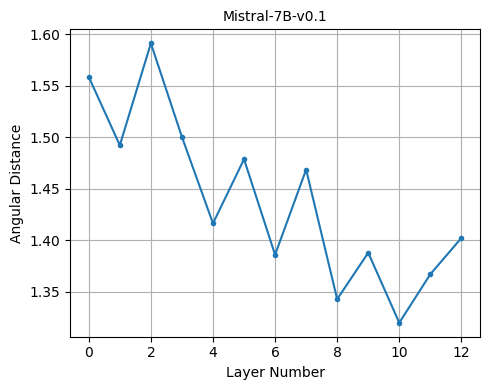

19


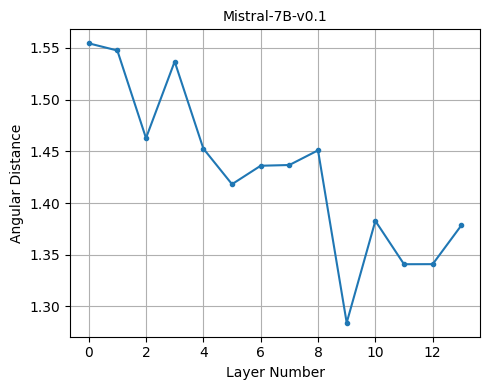

18


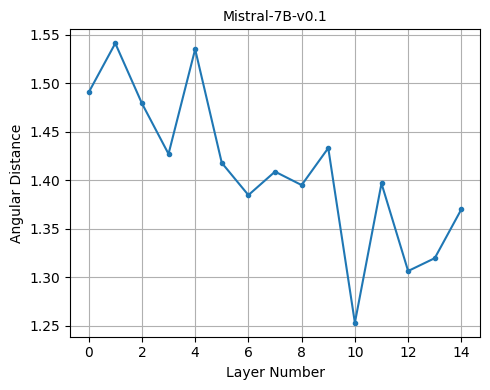

17


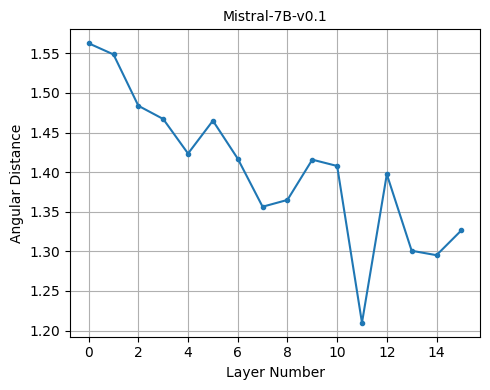

16


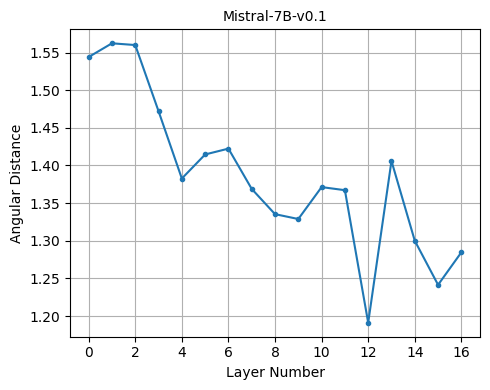

15


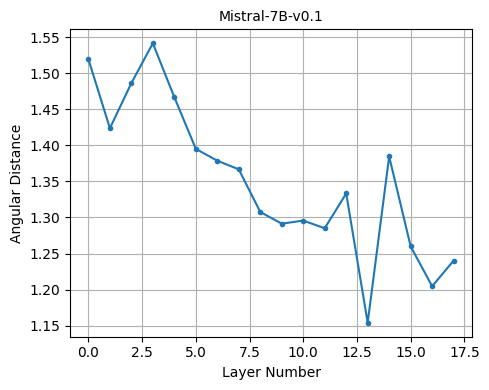

14


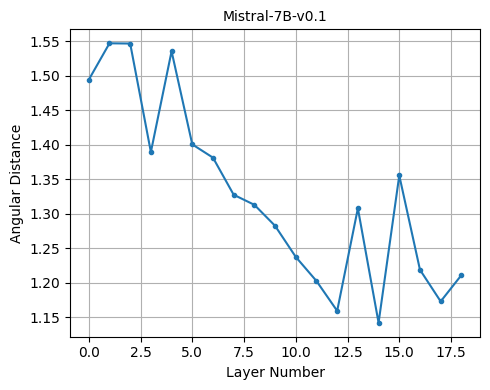

13


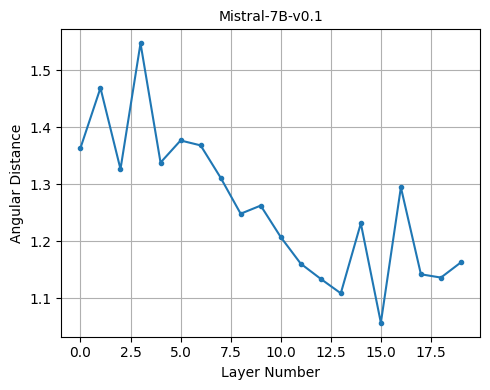

12


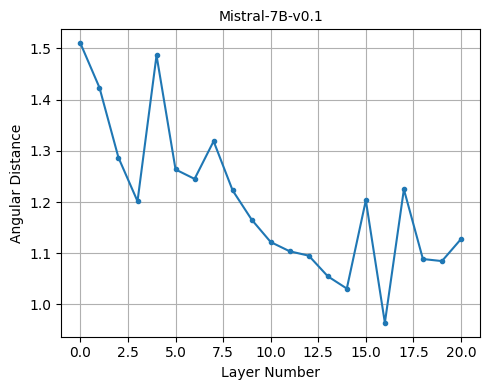

11


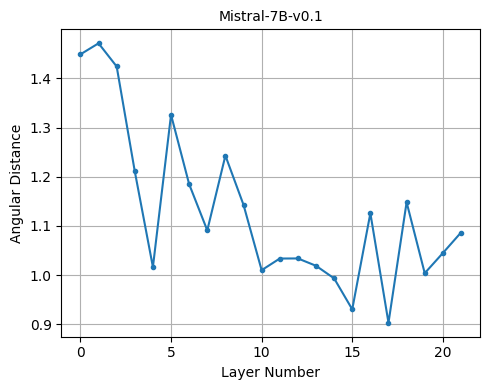

10


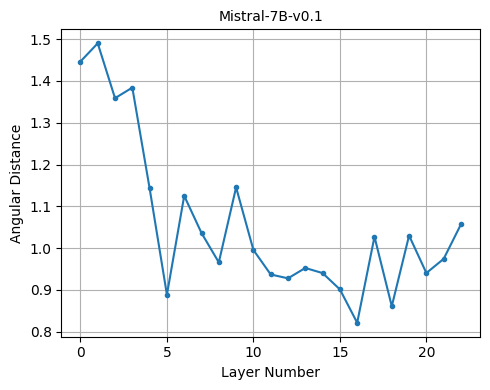

9


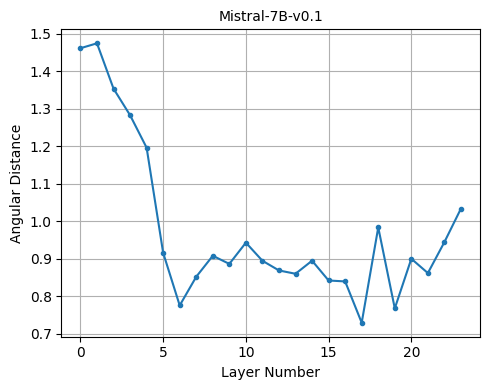

8


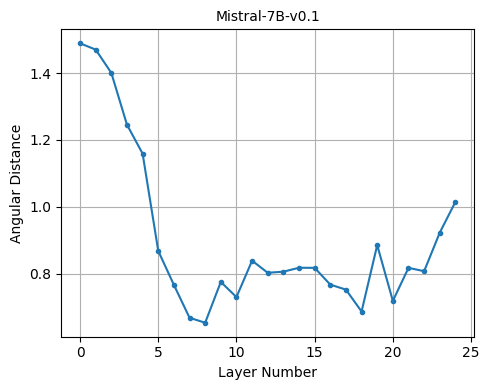

7


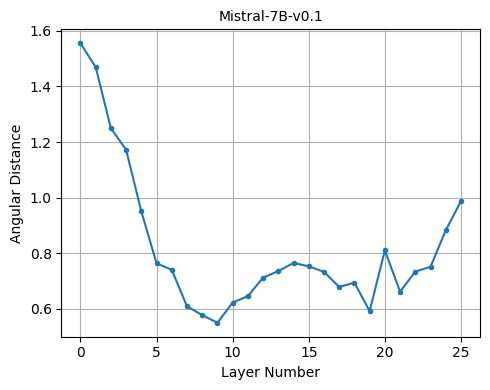

6


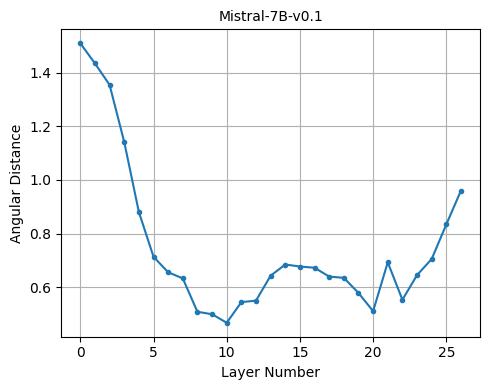

5


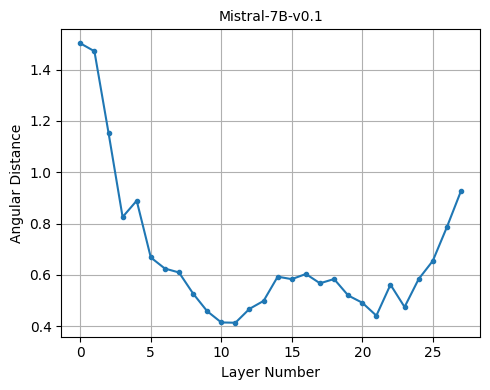

4


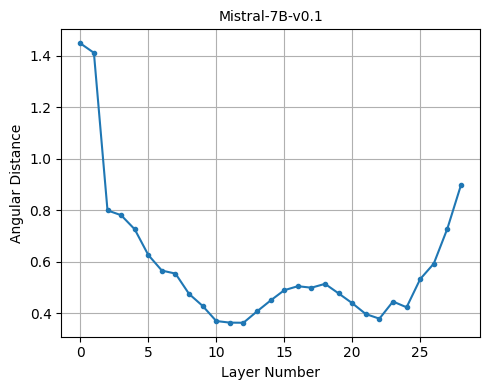

3


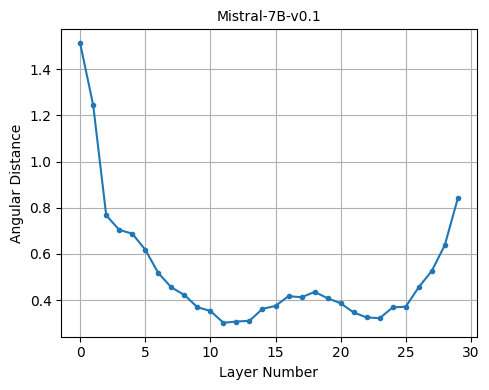

2


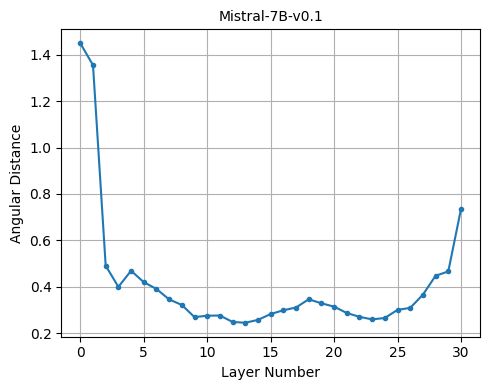

1


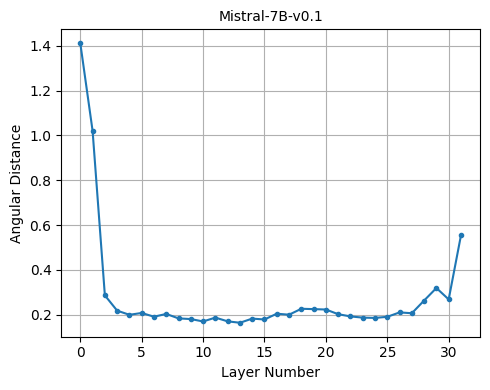

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import json
import os

     
def file_reader(fname):
    f = open(fname)
    data = json.load(f)
    f.close()
    # with open(fname, 'r') as j:
    #     data = json.loads(j.read())
    last_token_sim = np.array(data)
    return last_token_sim

x_min_mistral = [26, 24, 23, 23, 23, 22, 21, 21, 20, 20, 19, 17, 17, 16, 13, 13, 11, 8, 8, 6, 6, 5, 4, 3]

model_name = "mistralai/Mistral-7B-v0.1"
out_dir = "skip_data/"

num_layers = 32
# step_list = np.arange(1,0.8*num_layers+1).astype(int)
colors = plt.cm.viridis(np.linspace(0,1,25))
x_min = []
y_mid = []


# print(len(similarity["1"]))
# mean_sim = []

# for block_size in range(0,num_layers):
for block_size in range(24,0,-1):
    print(block_size)
    fname = out_dir+ f"l_{block_size}_output_c4_{model_name.split('/')[-1]}.json"
    if os.path.exists(fname):
        similarity_list = file_reader(fname)
        y = np.arccos(similarity_list).mean(axis=1)
        plt.plot(np.arange(num_layers-block_size+1),y,".-", label=f"{block_size}") #,color = colors[block_size],
        
    fname = out_dir+ f"l_{block_size}_tf_output_c4_{model_name.split('/')[-1]}.json"
    if os.path.exists(fname):
        # plt.figure(figsize=(5,4))
        similarity_list = file_reader(fname)
        y = np.arccos(similarity_list).mean(axis=1)
        plt.plot(np.arange(num_layers-block_size+1),y,".-", label=f"{block_size}") #,color = colors[block_size],

        # plt.plot(x_min_mistral[block_size-1],y.min(),"k^")

        plt.xlabel("Layer Number")# (similarity btw in and out of [x,x+1,x+2])")
        plt.ylabel("Angular Distance")
        plt.title(f"{model_name.split('/')[-1]}", fontsize= 10)
        plt.grid()
        # plt.xlim(15.5,27.5)
        # plt.ylim(0.05,0.25)
        # plt.legend(handlelength=1)#bbox_to_anchor=(1.2, 1.0))
        plt.tight_layout()
        # plt.savefig(f"c4_{model_name.split('/')[-1]}.png")
        plt.show()


In [10]:
!which python

/home/hshapour/.pyenv/versions/3.10.12/envs/pytorch/bin/python
